In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host="localhost",
                             username="root",
                             password="United@123",
                             database="ecommerce")

cur=db.cursor()

## List all unique city where sellers are located.

In [4]:
query="""select distinct seller_city from sellers"""

cur.execute(query)

data=cur.fetchall()

data

[('campinas',),
 ('mogi guacu',),
 ('rio de janeiro',),
 ('sao paulo',),
 ('braganca paulista',),
 ('brejao',),
 ('penapolis',),
 ('curitiba',),
 ('anapolis',),
 ('itirapina',),
 ('tubarao',),
 ('lauro de freitas',),
 ('imbituba',),
 ('brasilia',),
 ('porto seguro',),
 ('guaruja',),
 ('tabatinga',),
 ('salto',),
 ('tres de maio',),
 ('belo horizonte',),
 ('arapongas',),
 ('sao bernardo do campo',),
 ('tatui',),
 ('garopaba',),
 ('camanducaia',),
 ('tupa',),
 ('guarulhos',),
 ('sao jose dos pinhais',),
 ('sao ludgero',),
 ('sao jose',),
 ('piracicaba',),
 ('porto alegre',),
 ('congonhal',),
 ('santo andre',),
 ('osasco',),
 ('valinhos',),
 ('joinville',),
 ('saquarema',),
 ('barra velha',),
 ('petropolis',),
 ('santo antonio da patrulha',),
 ('ponta grossa',),
 ('santana de parnaiba',),
 ('sao carlos',),
 ('ibitinga',),
 ('barueri',),
 ('caxias do sul',),
 ('araguari',),
 ('contagem',),
 ('jaragua do sul',),
 ('lages - sc',),
 ('bento goncalves',),
 ('catanduva',),
 ('ribeirao pires',),

## Count the number of orders shipped in 2018.

In [2]:
query="""SELECT COUNT(*) 
         FROM orders 
         WHERE YEAR(order_purchase_timestamp) = 2018;"""

cur.execute(query)

data=cur.fetchall()

"total orders shipped in 2018 are", data[0][0]

('total orders shipped in 2018 are', 108022)

## Find the total revenue per seller.

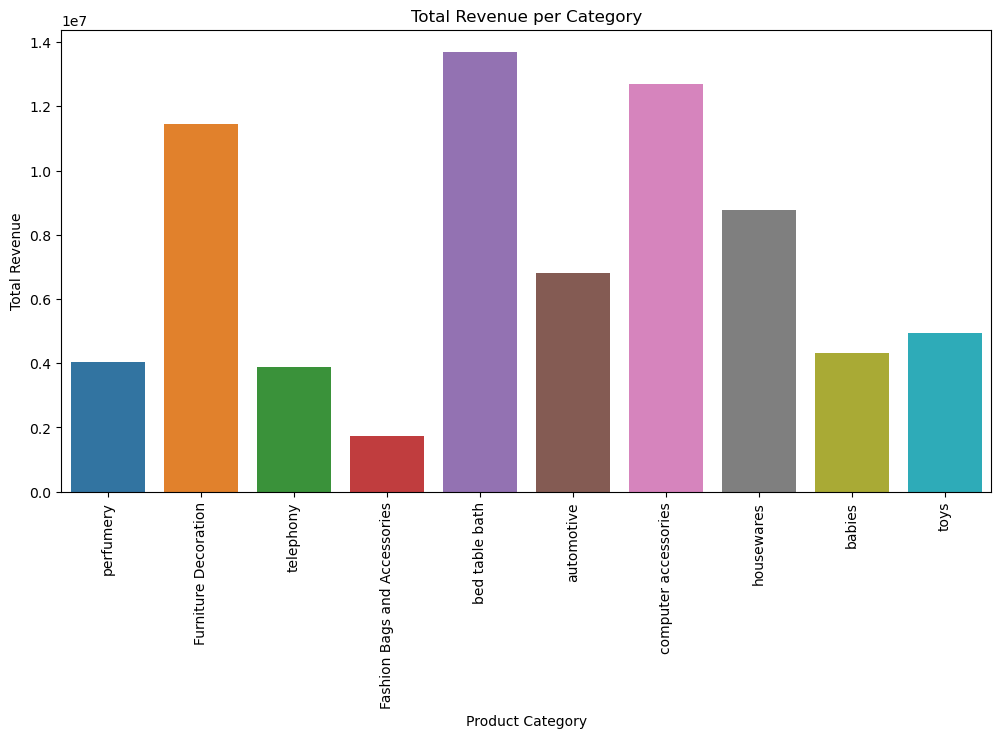

In [38]:
query = """SELECT 
    p.product_category AS category, 
    SUM(pay.payment_value) AS total_revenue
FROM 
    order_items oi
JOIN 
    products p ON oi.product_id = p.product_id
JOIN 
    payments pay ON oi.order_id = pay.order_id
GROUP BY 
    p.product_category
LIMIT 0, 10;"""


cur.execute(query)

data = cur.fetchall()

# Close the connection
cur.close()

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['category', 'total_revenue'])

# Set the plot size
plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(x='category', y='total_revenue', data=df)

# Set the title and labels
plt.title('Total Revenue per Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed

# Show the plot
plt.show()

## Calculate the percentage of orders that were delivered late.

In [3]:
query="""SELECT 
    COUNT(*) * 100.0 / (SELECT COUNT(*) FROM orders) AS percentage_late_orders
FROM orders 
WHERE order_delivered_customer_date > order_estimated_delivery_date;
"""

cur.execute(query)

data=cur.fetchall()

"percentage_late_orders", data[0][0]

('percentage_late_orders', Decimal('7.87100'))

## Intermediate Queries

## Calculate the number of orders per quarter in 2019.

In [13]:
query="""SELECT QUARTER(order_purchase_timestamp) AS quarter, COUNT(*) AS num_orders 
FROM orders 
WHERE YEAR(order_purchase_timestamp) = 2018
GROUP BY QUARTER(order_purchase_timestamp);"""

cur.execute(query)

data=cur.fetchall()

"order_purchase_timestamp", data[0:4]

('order_purchase_timestamp', [(3, 25640), (1, 42416), (2, 39958), (4, 8)])

## Find the average order value, grouped by seller state.

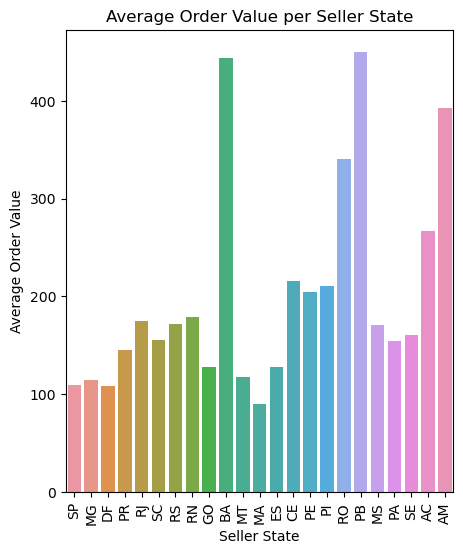

In [43]:
db = mysql.connector.connect(host="localhost",
                             username="root",
                             password="United@123",
                             database="ecommerce")

cur=db.cursor()

query="""SELECT seller_state, AVG(order_items.price) AS avg_order_value 
FROM order_items 
JOIN orders ON order_items.order_id = orders.order_id 
JOIN sellers ON order_items.seller_id = sellers.seller_id 
GROUP BY seller_state;"""

cur.execute(query)

data=cur.fetchall()

cur.close()

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['seller_state', 'avg_order_value'])

# Set the plot size
plt.figure(figsize=(5, 6))

# Create the bar plot
sns.barplot(x='seller_state', y='avg_order_value', data=df)

# Set the title and labels
plt.title('Average Order Value per Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed

# Show the plot
plt.show()

## Calculate the percentage of total orders contributed by each customer state.

In [18]:
query="""SELECT customer_state, COUNT(*) * 100.0 / (SELECT COUNT(*) FROM orders) AS percentage_orders 
FROM orders 
JOIN customers ON orders.customer_id = customers.customer_id 
GROUP BY customer_state;"""

cur.execute(query)

data=cur.fetchall()

"Percentage of total_orders by each customer", data

('Percentage of total_orders by each customer',
 [('SP', Decimal('83.96134')),
  ('PR', Decimal('10.14672')),
  ('RS', Decimal('10.99345')),
  ('MG', Decimal('23.40081')),
  ('BA', Decimal('6.79800')),
  ('RJ', Decimal('25.84849')),
  ('DF', Decimal('4.30406')),
  ('GO', Decimal('4.06271')),
  ('SC', Decimal('7.31489')),
  ('ES', Decimal('4.08886')),
  ('PI', Decimal('0.99557')),
  ('PA', Decimal('1.96096')),
  ('MT', Decimal('1.82420')),
  ('CE', Decimal('2.68702')),
  ('MS', Decimal('1.43804')),
  ('RO', Decimal('0.50884')),
  ('MA', Decimal('1.50240')),
  ('AL', Decimal('0.83064')),
  ('PE', Decimal('3.32257')),
  ('PB', Decimal('1.07803')),
  ('AM', Decimal('0.29766')),
  ('RN', Decimal('0.97545')),
  ('SE', Decimal('0.70393')),
  ('TO', Decimal('0.56315')),
  ('RR', Decimal('0.09252')),
  ('AC', Decimal('0.16291')),
  ('AP', Decimal('0.13676'))])

## Identify the relationship between order value and delivery time.

In [20]:
query="""SELECT 
    order_items.price AS order_value, 
    DATEDIFF(order_delivered_customer_date, order_purchase_timestamp) AS delivery_time 
FROM order_items 
JOIN orders ON order_items.order_id = orders.order_id;"""

cur.execute(query)

data=cur.fetchall()

"Relationship between order value and delivery time", data

('Relationship between order value and delivery time',
 [(109.9, 15),
  (99.0, 28),
  (179.99, 21),
  (179.9, 12),
  (179.9, 12),
  (49.9, 5),
  (49.99, 9),
  (99.9, 8),
  (99.9, 8),
  (149.0, 13),
  (118.9, 6),
  (243.37, 22),
  (89.9, 9),
  (89.9, 9),
  (56.99, 12),
  (39.49, 5),
  (39.49, 5),
  (320.0, 7),
  (42.9, 15),
  (28.0, 18),
  (12.77, 4),
  (46.4, 16),
  (104.9, None),
  (69.9, 14),
  (29.9, 6),
  (174.9, 12),
  (49.9, 9),
  (23.99, None),
  (89.0, 9),
  (349.9, 27),
  (102.9, 28),
  (29.98, 4),
  (29.0, 36),
  (29.0, 36),
  (99.0, 16),
  (65.0, 9),
  (89.99, 9),
  (12.5, 24),
  (259.9, 2),
  (27.99, 18),
  (64.9, 6),
  (59.9, 6),
  (59.9, 6),
  (119.94, 14),
  (249.0, 9),
  (39.9, 7),
  (39.9, 6),
  (60.0, 15),
  (159.0, 2),
  (159.0, 2),
  (39.99, 2),
  (189.9, 14),
  (189.9, 14),
  (49.0, 5),
  (139.9, 4),
  (27.99, 14),
  (56.97, 10),
  (145.0, 9),
  (219.0, 5),
  (49.0, 12),
  (113.57, 13),
  (113.57, 13),
  (146.0, 9),
  (122.99, 10),
  (289.0, 7),
  (134.0, 10),
  (3

## Calculate the total number of unique products sold by each seller.

In [21]:
query="""SELECT seller_id, COUNT(DISTINCT product_id) AS num_unique_products 
FROM order_items 
GROUP BY seller_id;
"""

cur.execute(query)

data=cur.fetchall()

"Total number of unique products sold by each customer", data

('Total number of unique products sold by each customer',
 [('0015a82c2db000af6aaaf3ae2ecb0532', 1),
  ('001cca7ae9ae17fb1caed9dfb1094831', 11),
  ('001e6ad469a905060d959994f1b41e4f', 1),
  ('002100f778ceb8431b7a1020ff7ab48f', 24),
  ('003554e2dce176b5555353e4f3555ac8', 1),
  ('004c9cd9d87a3c30c522c48c4fc07416', 88),
  ('00720abe85ba0859807595bbf045a33b', 9),
  ('00ab3eff1b5192e5f1a63bcecfee11c8', 1),
  ('00d8b143d12632bad99c0ad66ad52825', 1),
  ('00ee68308b45bc5e2660cd833c3f81cc', 23),
  ('00fc707aaaad2d31347cf883cd2dfe10', 19),
  ('010543a62bd80aa422851e79a3bc7540', 1),
  ('010da0602d7774602cd1b3f5fb7b709e', 1),
  ('011b0eaba87386a2ae96a7d32bb531d1', 1),
  ('01266d4c46afa519678d16a8b683d325', 3),
  ('013900e863eace745d3ec7614cab5b1a', 19),
  ('014c0679dd340a0e338872e7ec85666a', 10),
  ('014d9a685fd57276679edd00e07089e5', 3),
  ('0176f73cc1195f367f7b32db1e5b3aa8', 18),
  ('01bcc9d254a0143f0ce9791b960b2a47', 3),
  ('01c97ebb5cdac52891c0ed1c37ba0012', 3),
  ('01cf7e3d21494c41fb86034f2e7

## Advanced Queries

## Calculate the median order value for each customer.

In [25]:
query = """
WITH OrderedPrices AS (
    SELECT
        o.customer_id,
        oi.order_id,
        oi.price,
        ROW_NUMBER() OVER (PARTITION BY o.customer_id ORDER BY oi.price) AS row_num,
        COUNT(*) OVER (PARTITION BY o.customer_id) AS total_rows
    FROM order_items oi
    JOIN orders o ON o.order_id = oi.order_id
),
Medians AS (
    SELECT
        customer_id,
        AVG(price) AS median_order_value
    FROM OrderedPrices
    WHERE
        row_num IN (FLOOR((total_rows + 1) / 2), CEIL((total_rows + 1) / 2))
    GROUP BY customer_id
)
SELECT customer_id, median_order_value
FROM Medians;
"""

cur.execute(query)
data = cur.fetchall()

data

[('00012a2ce6f8dcda20d059ce98491703', 89.80000305175781),
 ('000161a058600d5901f007fab4c27140', 54.900001525878906),
 ('0001fd6190edaaf884bcaf3d49edf079', 179.99000549316406),
 ('0002414f95344307404f0ace7a26f1d5', 149.89999389648438),
 ('000379cdec625522490c315e70c7a9fb', 93.0),
 ('0004164d20a9e969af783496f3408652', 59.9900016784668),
 ('000419c5494106c306a97b5635748086', 34.29999923706055),
 ('00046a560d407e99b969756e0b10f282', 120.9000015258789),
 ('00050bf6e01e69d5c0fd612f1bcfb69c', 69.98999786376953),
 ('000598caf2ef4117407665ac33275130', 1107.0),
 ('0005aefbb696d34b3424dccd0a0e9fd0', 134.89999389648438),
 ('00062b33cb9f6fe976afdcff967ea74d', 47.9900016784668),
 ('00066ccbe787a588c52bd5ff404590e3', 49.900001525878906),
 ('00072d033fe2e59061ae5c3aff1a2be5', 89.9000015258789),
 ('0009a69b72033b2d0ec8c69fc70ef768', 159.89999389648438),
 ('000bf8121c3412d3057d32371c5d3395', 15.0),
 ('000e943451fc2788ca6ac98a682f2f49', 89.9000015258789),
 ('000f17e290c26b28549908a04cfe36c1', 122.9000015